# 1.Import library

In [88]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd

# 2.Read dataset

In [89]:
df = pd.read_csv('Walmart.csv')

In [90]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 3.Cleaning the dataset

In [91]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [92]:
df.shape

(6435, 8)

In [93]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [95]:
# Top 5 stores with the higest total sales 
df.groupby("Store").agg({"Weekly_Sales":"sum"}).sort_values("Weekly_Sales",ascending=False).head(5)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


In [96]:
#  stores with the least total sales 
df.groupby("Store").agg({"Weekly_Sales":"sum"}).sort_values("Weekly_Sales",ascending=True).head(5)

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42


In [97]:
#Top weeks with the highest sales 
df.sort_values("Weekly_Sales",ascending=False).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795


In [98]:
#weeks with the lowest sales 
df.sort_values("Weekly_Sales",ascending=True).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,03-12-2010,209986.25,0,52.82,3.041,126.731333,9.265
4614,33,29-10-2010,213538.32,0,71.34,3.130,126.436419,9.265
4675,33,30-12-2011,215359.21,1,51.60,3.428,130.071032,8.010
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
4671,33,02-12-2011,220060.35,0,59.12,3.701,129.845967,8.010


In [99]:
#Average weekly sales in holiday vs non-holiday week
df.groupby("Holiday_Flag").agg({"Weekly_Sales":"mean"})

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


# 4.Visualisation

Text(0.5, 1.0, 'Sctter plot of Weekly Sales vs Temperature')

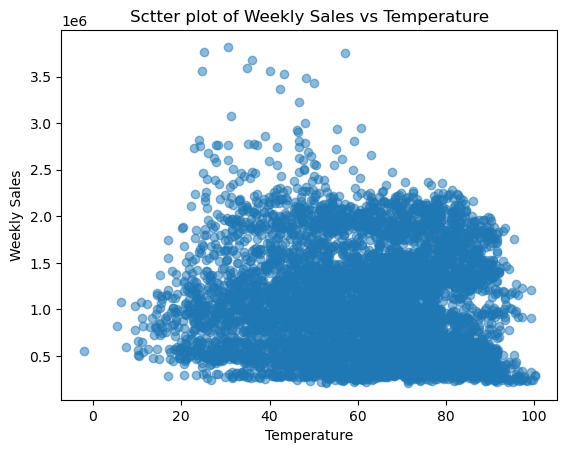

In [100]:
#Temprature and Weekly Sales - Sctter plot  
plt.scatter(df["Temperature"],df["Weekly_Sales"], alpha = 0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Sctter plot of Weekly Sales vs Temperature")

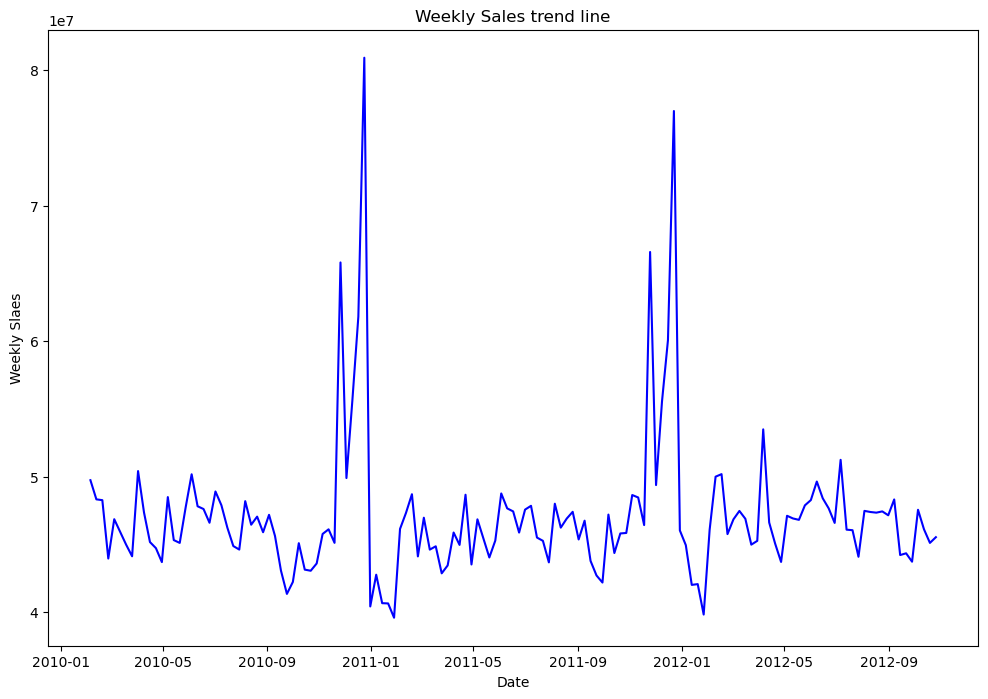

In [101]:
# Weekly Sales trend line

#changing the date data type 
df["Date"] = pd.to_datetime(df["Date"], format = '%d-%m-%Y')

# aggeregate all the weekly sales
WeeklySales = df.groupby(["Date"])["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(12,8))

plt.plot(WeeklySales["Date"],WeeklySales["Weekly_Sales"],color="blue")
plt.xlabel("Date")
plt.ylabel("Weekly Slaes")
plt.title("Weekly Sales trend line")
plt.show()

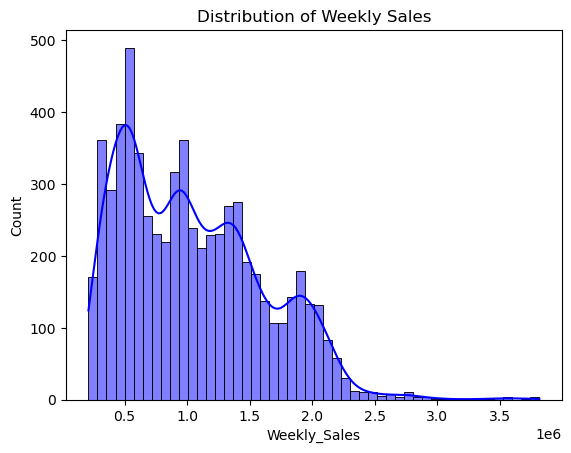

In [102]:
# Distribution of wekly sales
sns.histplot(df['Weekly_Sales'], bins = 50,color = "blue", edgecolor = "black", kde = True)
plt.title("Distribution of Weekly Sales")
plt.show()

/var/folders/5q/b9mnmj116r3gzjp18mlfm3n40000gn/T/ipykernel_7202/864906883.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



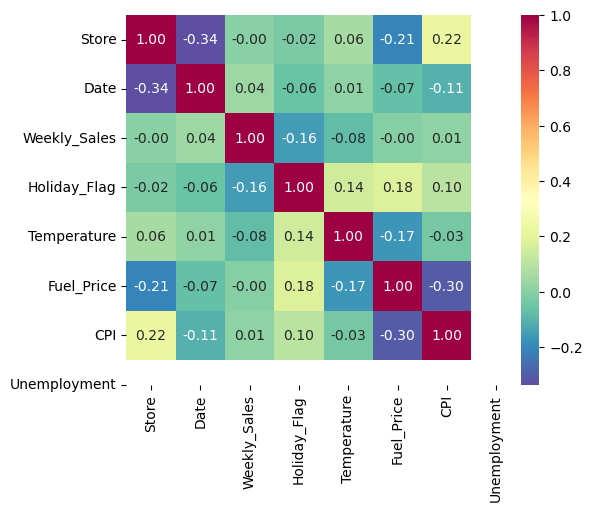

In [103]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

# 5. Summary 

The EDA steps outlined above have provided us with initial glimpses into prominent stores, trends, and the relationships among the variables in our dataset. This preliminary understanding can be instrumental in subsequent stages of model development, aiding us in the estimation of weekly sales.